In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pomegranate import *
import itertools as it
np.random.seed(21)

/Users/austinriis-due/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


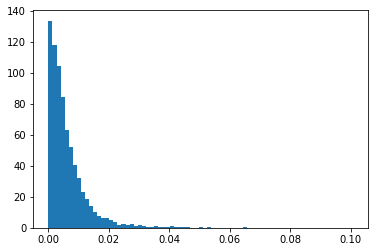

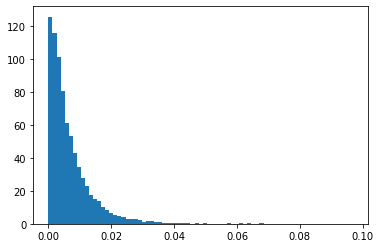

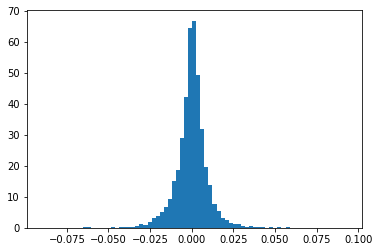

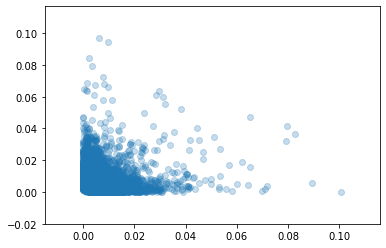

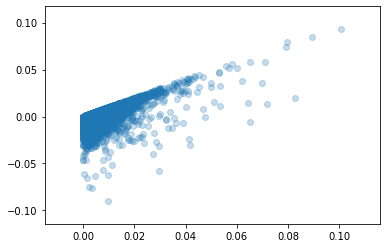

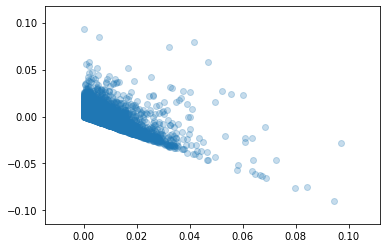

In [2]:
## reading in SPY data, splitting into training and holdout sets
df = pd.read_csv('SPY-7.csv')
test = df[-400:]
t_highopen = (test.High - test.Open) / test.Open
t_openlow = (test.Open - test.Low) / test.Open
t_closeopen = (test.Close - test.Open) / test.Open
test = np.vstack((np.array(t_highopen),np.array(t_openlow),np.array(t_closeopen))).T
df = df[:-400]
highopen = (df.High - df.Open) / df.Open
openlow = (df.Open - df.Low) / df.Open
closeopen = (df.Close - df.Open) / df.Open
## Plotting histograms and relationships between vars
plt.figure(1)
plt.hist(highopen,bins=75,density=True)
plt.figure(2)
plt.hist(openlow,bins=75,density=True)
plt.figure(3)
plt.hist(closeopen,bins=75,density=True)
plt.figure(4)
plt.scatter(highopen,openlow,alpha=0.25)
plt.figure(5)
plt.scatter(highopen,closeopen,alpha=0.25)
plt.figure(6)
plt.scatter(openlow,closeopen,alpha=0.25)
plt.show()

In [3]:
## training data
X = np.vstack((np.array(highopen),np.array(openlow),np.array(closeopen))).T

In [8]:
## comp := components in GMM, clust := number of hidden states
comp=4
clust=5
y_hat = Kmeans(k=clust).fit(X).predict(X)
gmms = [GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_components=comp, X=X[y_hat == k]) for k in range(clust)] 
hmm = HiddenMarkovModel.from_matrix(np.ones((clust, clust)) / float(clust), gmms, starts=np.ones(clust)/float(clust))
hmm.bake()
hmm.fit(X)

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "GeneralMixtureModel",
                "distributions" : [
                    {
                        "class" : "Distribution",
                        "name" : "MultivariateGaussianDistribution",
                        "parameters" : [
                            [
                                5.100326266014296e-17,
                                0.004552534614047229,
                                -9.535940915371633e-17
                            ],
                            [
                                [
                               

In [9]:
%%time
## N is fineness of grid, f is multiplier for return fineness
N = 10
f = 5
## d is latency, p is projection length
d = 10
p = len(test) - d
## Setting up grid to test over
grid_highopen = [test.T[0].min() + i*(test.T[0].max() - test.T[0].min()) / N for i in range(N)]
grid_openlow = [test.T[1].min() + i*(test.T[1].max() - test.T[1].min()) / N for i in range(N)]
grid_closeopen = [test.T[2].min() + i*(test.T[2].max() - test.T[2].min()) / (f*N) for i in range(f*N)]
projections = []
for k in range(p):
    scores = []
    ## Cartesian product over grid variables to get possible combos
    for i in it.product(grid_highopen, grid_openlow, grid_closeopen):
        ## Take observation vector of length d
        a = list(test[k:k+d+1])
        ## add suggested observation value for position d + 1
        a.append(np.array(i))
        ## Score probability of vector
        scores.append(hmm.log_probability(a))
    j = 0
    for x in it.product(grid_highopen, grid_openlow, grid_closeopen):
        ## Grabbing projection value in loop since itertools isn't iterable
        if j == np.argmax(scores):
            projections.append(x)
        j+=1

CPU times: user 11min 16s, sys: 829 ms, total: 11min 17s
Wall time: 11min 17s


In [10]:
proj = np.array([x[2] for x in projections])

In [11]:
true = test.T[2][d:p+d]

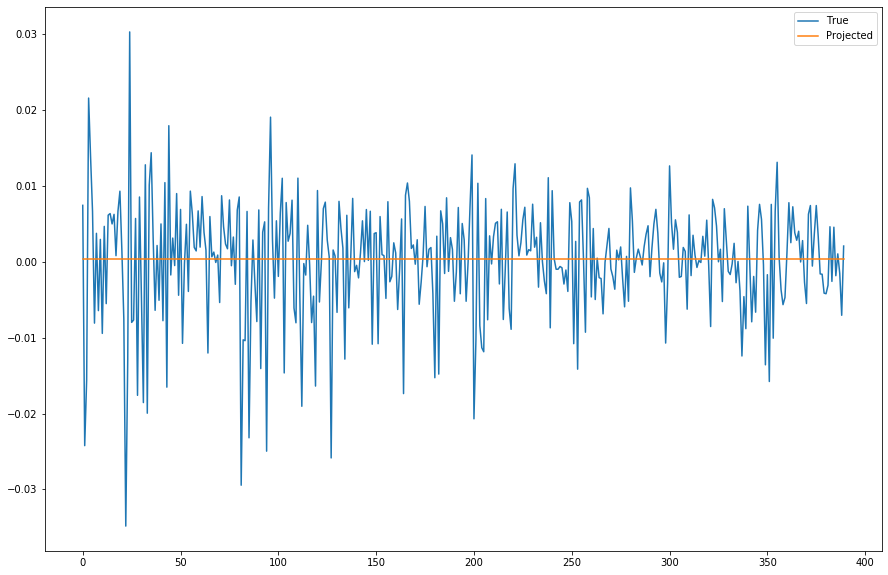

In [15]:
plt.figure(figsize = (15,10))
plt.plot(true,label='True')
plt.plot(proj,label='Projected')
plt.legend()
plt.show()

In [14]:
projections

[(6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0, 0.0003374489610500908),
 (6.819122031145662e-05, 0.0